# Proyecto Corazon

In [72]:
# Standard libraries for data analysis
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats
import pickle 

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload

%autoreload 2

from pyexpat import model
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np 


# Exploratory Data Analysis

### variables en el dataframe


##### - __Gender__ : sex of the patient 
##### - __Age__ : age of the patient
##### - __Hypertension__ : blood pressure of the patient
##### - __Heart_Disease__ : pre-existing heart complications
##### - __Ever_Married__ : Marital status of the patient
##### - __Work_Type__ : work type of the patient
##### - __Residence_Type__ : type of residence of the patient
##### - __Avg_Glucose_Level__ : sugar levels of the patient
##### - __BMI__ : body mass index of the patient
##### - __Smoking_Status__ : Has the patient ever smoked in the past
##### - __Stroke__ : has the patient ever suffered stroke in the past

In [73]:
# A variable path to the dataset
path_to_data = "./stroke_dataset(1).csv"
#===============================================
# Import the dataset
df = pd.read_csv(path_to_data)

In [74]:
# Basic data analysis
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [75]:
# Beginning of the DataFrame
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [76]:
# End of the DataFrame
df.tail()

gender   age  hypertension  heart_disease ever_married work_type  \
4976    Male  41.0             0              0           No   Private   
4977    Male  40.0             0              0          Yes   Private   
4978  Female  45.0             1              0          Yes  Govt_job   
4979    Male  40.0             0              0          Yes   Private   
4980  Female  80.0             1              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0

In [77]:
# Shape of rows and columns in the data frame
df.shape

(4981, 11)

In [78]:
# Visualization of the non null variables
df.isnull().sum(axis =0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [79]:
# Verify that there are no duplicated variables
df.duplicated().sum()

0

In [80]:
# Para ver el balanceo de la variable target stoke 
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [81]:
# Convert variables to boolean values
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["stroke"] = df["stroke"].astype(bool)

In [82]:
# Visualization of the Variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB



### Una variable puede ser de dos tipos:

##### Categórica: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su  vez pueden ser:
##### Binarias: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
##### Politómicas: Pueden tomar más de dos valores.
##### Numérica: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
##### Continuas: Entre dos valores dados, podemos encontrar infinitos valores
##### Discretas: Cuando entre dos valores dados, no puede tomar valores intermedios


#### Separation into categorical and numerical variables

In [83]:
categoricas = ["gender", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]
numericas = ["age", "avg_glucose_level", "bmi"]

In [84]:
# visualization of dataframe with columns
df[categoricas].describe()

gender work_type Residence_type smoking_status hypertension  \
count     4981      4981           4981           4981         4981   
unique       2         4              2              4            2   
top     Female   Private          Urban   never smoked        False   
freq      2907      2860           2532           1838         4502   

       heart_disease  
count           4981  
unique             2  
top            False  
freq            4706

In [85]:
# Variable count in the categorical value
#===============================================
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: gender
Female    2907
Male      2074
Name: gender, dtype: int64

Column name: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Column name: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

Column name: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

Column name: hypertension
False    4502
True      479
Name: hypertension, dtype: int64

Column name: heart_disease
False    4706
True      275
Name: heart_disease, dtype: int64



In [86]:
# Duplicated data
#===============================================
df_duplicadas = df[df.duplicated()]
len(df_duplicadas)

0

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>]], dtype=object)

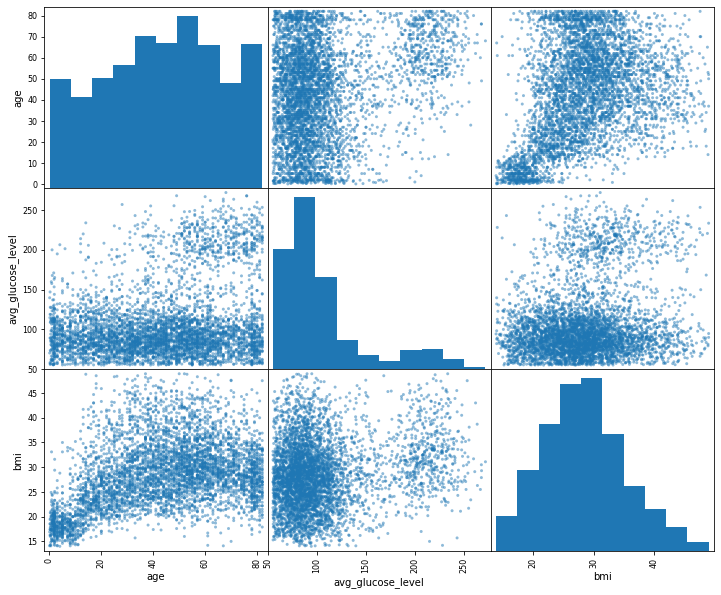

In [87]:
# Visualization of the correlation between variables 
#===============================================
pd.plotting.scatter_matrix(df[numericas], figsize=(12,10))

<AxesSubplot:>

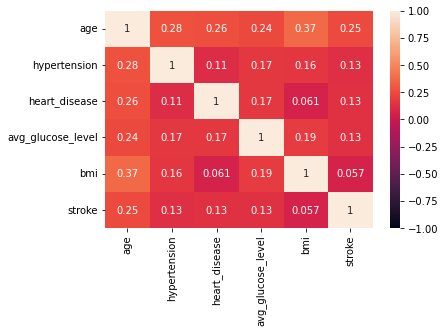

In [88]:
# Correlation between variables in the heatmap 
#===============================================
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

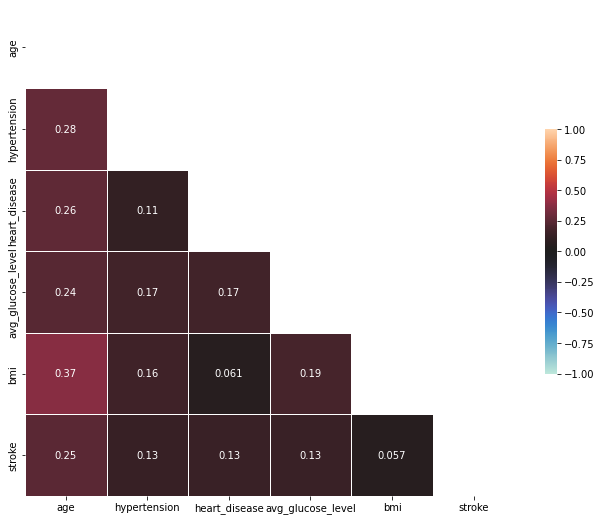

In [89]:
# Another heatmap but nicer
#===========================================================================
# Generate a mask to not duplicate variables
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#===========================================================================
# Configurate Matplotlib
f, ax = plt.subplots(figsize=(11, 9))
#===========================================================================
# Plot the heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##### Low correlation between variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

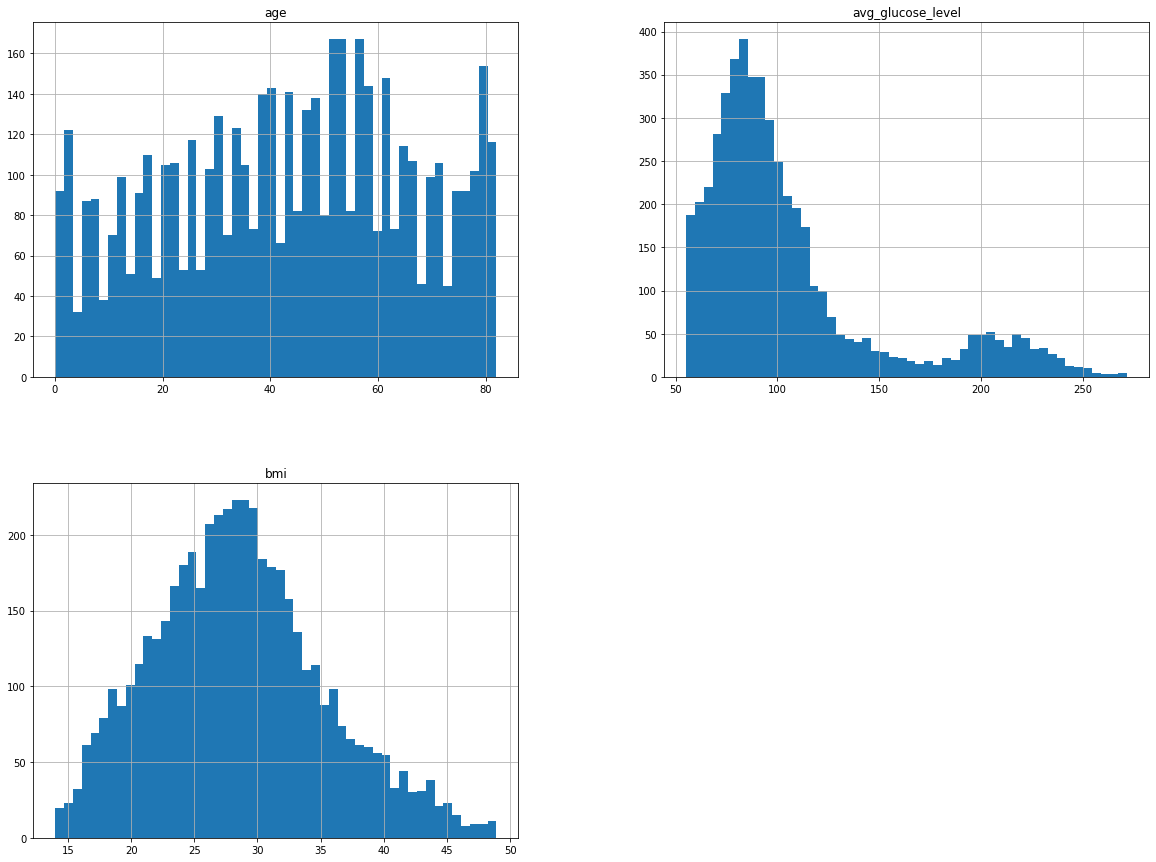

In [90]:
# Histogram of the numerical variables to the see their distribution
df[numericas].hist(bins=50, figsize=(20,15))

##### The variables Age, Ave_Glucose_Level, and BMI have normal distributions

<AxesSubplot:xlabel='age', ylabel='Count'>

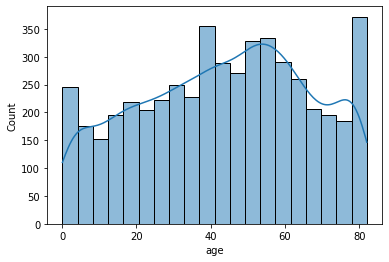

In [91]:
# Age distribution
sns.histplot(data=df, x="age", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

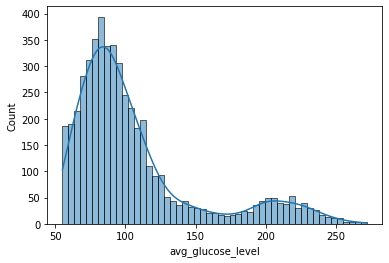

In [92]:
# Average glucose level distribution
sns.histplot(data=df, x="avg_glucose_level", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

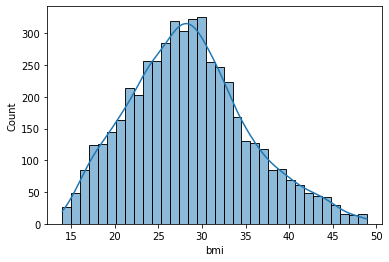

In [93]:
# BMI distribution
sns.histplot(data=df, x="bmi", kde=True)

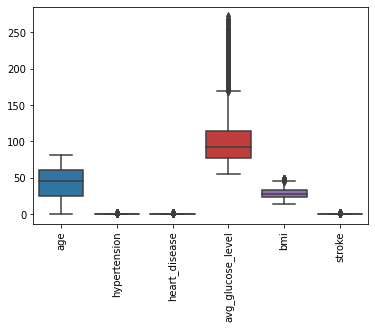

In [94]:
# Visualiazation of outliers 
# =======================================================
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [95]:
# Verify how many values we lose if we stay with variables wit a BMI value less than 45
# ===================================================================
len(df[df["bmi"]>45])

65

<AxesSubplot:xlabel='bmi', ylabel='age'>

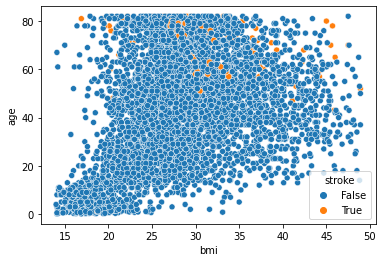

In [96]:
# Visualization of the variables
sns.scatterplot(data=df, x="bmi", y="age", hue="stroke")

<AxesSubplot:xlabel='bmi'>

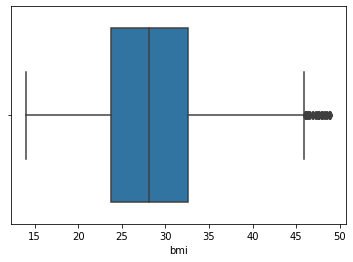

In [97]:
# Visualization of the variables BMI and its posible outliers
# =======================================================
df["bmi"].skew()
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='age'>

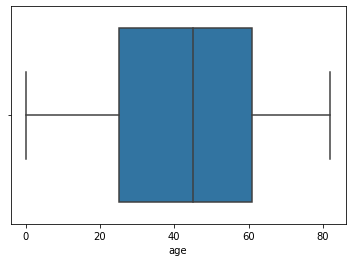

In [98]:
# Visulization of Age variable with no outlier detection
# =======================================================
df["age"].skew()
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='avg_glucose_level'>

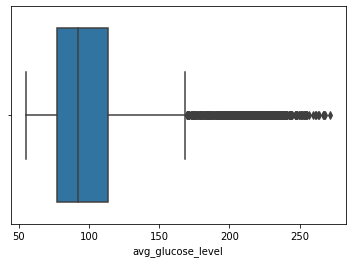

In [99]:
# Visualization avg_glucose_level variable and posible outliers
# =======================================================
df["avg_glucose_level"].skew()
sns.boxplot(x=df["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level'>

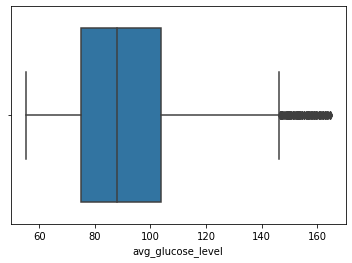

In [100]:
# Visulization of the avg_glucose_levels with a high threshold of 165
sns.boxplot(x= df[(df["avg_glucose_level"]<165 )]["avg_glucose_level"])

## Ingeniería de características

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


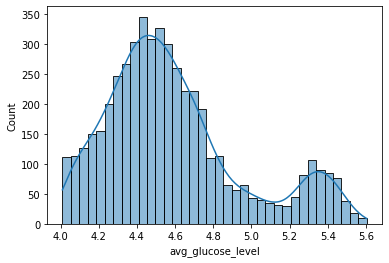

In [101]:
# Apply a logarithm with a base of 10
log_glucose = np.log(df["avg_glucose_level"])
#Create a column = log_price
df["avg_glucose_level"] = log_glucose
sns.histplot(x=log_glucose, kde=True)
df.info()

In [102]:
# Seperate the patients that did not suffer a stroke, with those that have a glucose level above 170
infartos = df[df["stroke"]== True]
infartos_bmipeque = infartos[df["bmi"]<20]
infartos_bmigrande = infartos[df["bmi"]>43]

# Count of how many patients comply with these conditions
print(f"Hay {len(infartos_bmipeque)} personas que sufieron infarto, con un bmi muy pequeño")
print(f"Hay {len(infartos_bmigrande)} personas que sufieron infarto, con un bmi muy alto")

Hay 4 personas que sufieron infarto, con un bmi muy pequeño
Hay 9 personas que sufieron infarto, con un bmi muy alto


/tmp/ipykernel_5152/3141896633.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  infartos_bmipeque = infartos[df["bmi"]<20]
/tmp/ipykernel_5152/3141896633.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  infartos_bmigrande = infartos[df["bmi"]>43]


In [103]:
#Eliminate outliers BMI values <20
df.drop(df[(df['stroke'] == True) & (df['bmi'] < 20)].index, inplace = True)

In [104]:
# Eliminate outliers BMI values >43
df.drop(df[(df['stroke'] == True) & (df['bmi'] > 43)].index, inplace = True)

In [105]:
no_infartos = df[df["stroke"]==False]
no_infartos_bmigrande = no_infartos[df["bmi"]>47]

# Count how many patients comply with theses conditions
print(f"Hay {len(no_infartos_bmigrande)} personas que no sufieron infarto, con un bmi muy alto")

Hay 25 personas que no sufieron infarto, con un bmi muy alto


/tmp/ipykernel_5152/3209644789.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_infartos_bmigrande = no_infartos[df["bmi"]>47]


In [106]:
# Visualization of ave_glucose_level patients with a level above 170
len(df[df["avg_glucose_level"]>170])


0

In [107]:
# Separate the patients who suffered a stroke with those who have a glucose level above 170
infartos_glucosa = df.loc[((df['stroke'] == True) & (df['avg_glucose_level'] > 170)),:]              

len(infartos_glucosa)

0

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 [Text(0, 0, '0.08'),
  Text(1, 0, '0.16'),
  Text(2, 0, '0.24'),
  Text(3, 0, '0.32'),
  Text(4, 0, '0.4'),
  Text(5, 0, '0.48'),
  Text(6, 0, '0.56'),
  Text(7, 0, '0.64'),
  Text(8, 0, '0.72'),
  Text(9, 0, '0.8'),
  Text(10, 0, '0.88'),
  Text(11, 0, '1.0'),
  Text(12, 0, '1.08'),
  Text(13, 0, '1.16'),
  Text(14, 0, '1.24'),
  Text(15, 0, '1.32'),
  Text(16, 0, '1.4'),
  Text(17, 0, '1.48'),
  Text(18, 0, 

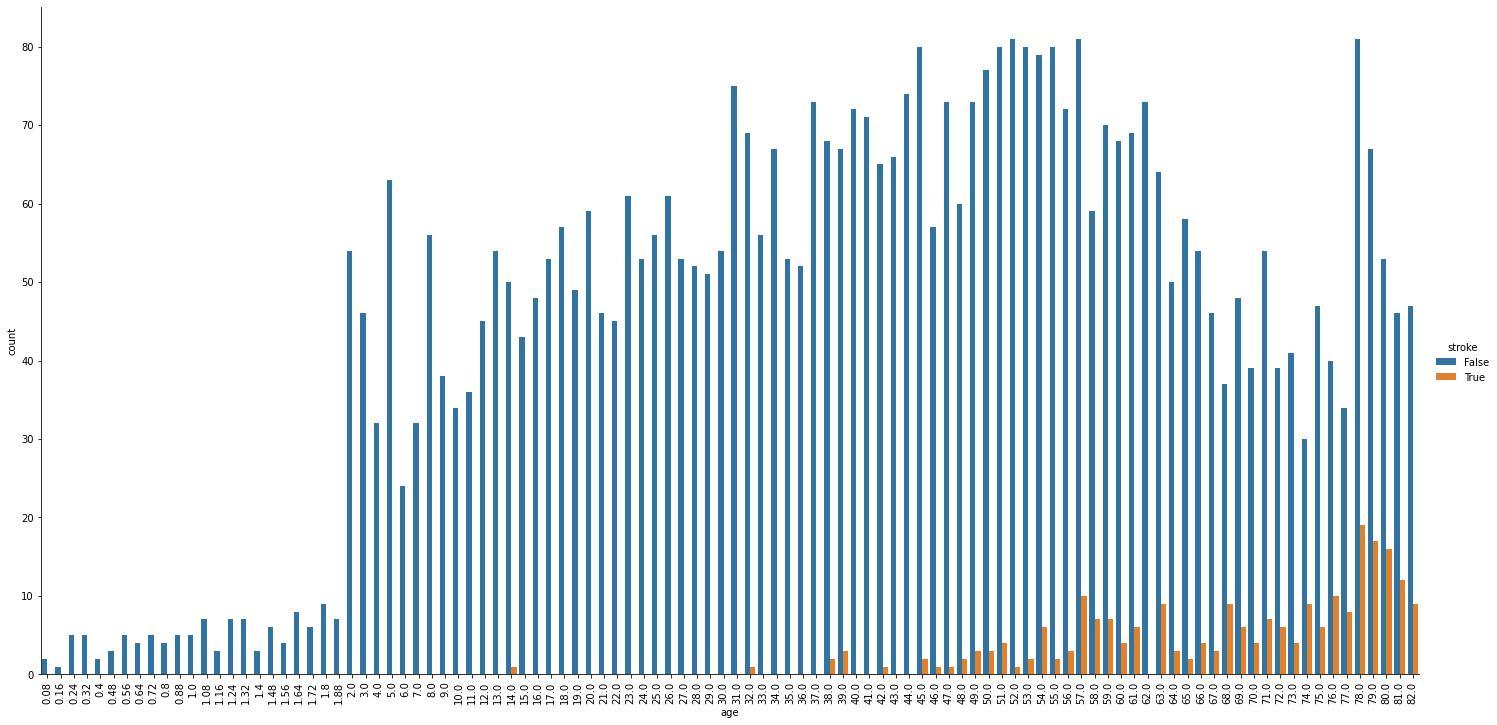

In [108]:
# Visualization of the patients by age and if they suffered a stroke or not
sns.catplot(x ="age", hue ="stroke", kind ="count", data = df, aspect=2, height=10)
plt.xticks(rotation=90)

In [109]:
#Eliminate the outliers in Age
df.drop(df[df['age'] == 1.32].index, inplace = True)

In [110]:
# Eliminate a stroke patient with an age of 14
df.drop(df[df['age'] == 14].index, inplace = True)

In [111]:
# Eliminate a stroke patient with an age of 32
df.drop(df[df['age'] == 32].index, inplace = True)

In [112]:
# Visualization of the datframe after eliminating the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4840 non-null   object 
 1   age                4840 non-null   float64
 2   hypertension       4840 non-null   bool   
 3   heart_disease      4840 non-null   bool   
 4   ever_married       4840 non-null   object 
 5   work_type          4840 non-null   object 
 6   Residence_type     4840 non-null   object 
 7   avg_glucose_level  4840 non-null   float64
 8   bmi                4840 non-null   float64
 9   smoking_status     4840 non-null   object 
 10  stroke             4840 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 354.5+ KB


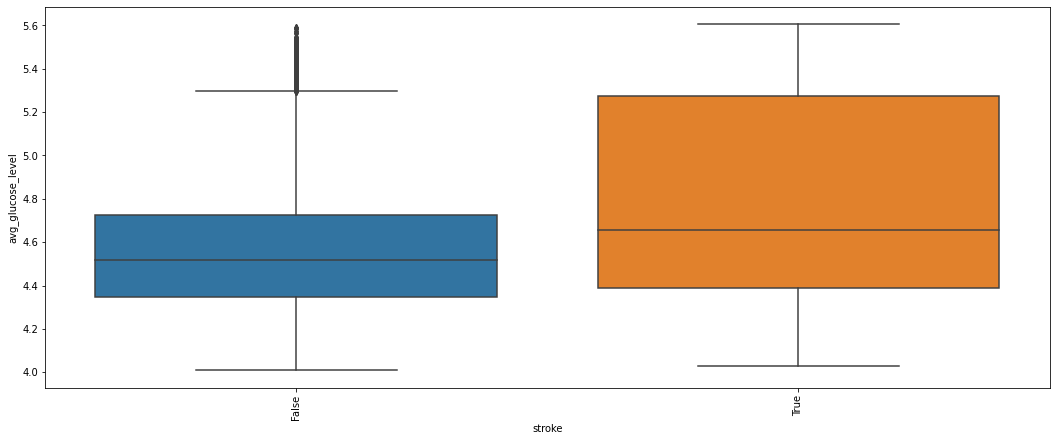

In [113]:
# Visualization of the distribution between glucose level patiens and if they suffered a stroke or not 
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='avg_glucose_level', x='stroke', data=df, ax=ax) 
plt.xticks(rotation=90)
plt.show()

In [114]:
# Seperate the patients that didn't have a stroke and have a glucose level above 170
no_infartos_glucosa = df.loc[((df['stroke'] == False) & (df['avg_glucose_level'] > 170)),:]            

# Count how many patients comply with these conditions
len(no_infartos_glucosa)

0

In [115]:
#Eliminate outliers from avg_glucose_level
df.drop(df[(df['stroke'] == False) & (df['avg_glucose_level'] > 170)].index, inplace = True)

In [116]:
# Verify that the outliers have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4840 non-null   object 
 1   age                4840 non-null   float64
 2   hypertension       4840 non-null   bool   
 3   heart_disease      4840 non-null   bool   
 4   ever_married       4840 non-null   object 
 5   work_type          4840 non-null   object 
 6   Residence_type     4840 non-null   object 
 7   avg_glucose_level  4840 non-null   float64
 8   bmi                4840 non-null   float64
 9   smoking_status     4840 non-null   object 
 10  stroke             4840 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 354.5+ KB


In [117]:
# Converted true/false values to 0/1 
df["stroke"].replace({False:0, True: 1}, inplace=True)
df["stroke"]

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4840, dtype: int64

In [118]:
# Elimintated ever_married column
df.drop("ever_married", axis=1, inplace=True)

In [119]:
# Separated X and Y values
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [120]:
# Visualization of the y value_counts
y.value_counts() 

0    4607
1     233
Name: stroke, dtype: int64

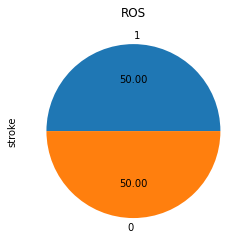

In [121]:
# Applied over sampling technique to unbalanced minority distributions
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("ROS")

##### With this over sampling technique the random technique takes a row of the dataframe and duplicates it at the top of the dataframe, repeating this process in random until the sets are are balanced.

In [122]:
# Class distribution
y_res.value_counts()

1    4607
0    4607
Name: stroke, dtype: int64

In [123]:
# Visualization of the new X distribution
X.head()

gender   age  hypertension  heart_disease      work_type Residence_type  \
0    Male  67.0         False           True        Private          Urban   
1    Male  80.0         False           True        Private          Rural   
2  Female  49.0         False          False        Private          Urban   
3  Female  79.0          True          False  Self-employed          Rural   
4    Male  81.0         False          False        Private          Urban   

   avg_glucose_level   bmi   smoking_status  
0           5.432367  36.6  formerly smoked  
1           4.662684  32.5     never smoked  
2           5.143008  34.4           smokes  
3           5.159745  24.0     never smoked  
4           5.226875  29.0  formerly smoked

In [124]:
# Visualization of the new Y distribution
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [125]:
# Creation of the transformers that will be handling our categorical and numerical values

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)


transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [126]:
# Creation of the transformers that will be handling our categorical and numerical values
transformer_numerico_2 = ("transformer_numerico_2", MinMaxScaler(), numericas)
transformer_categorico_2 = ("transformer_categorico_2", OneHotEncoder(), categoricas)

transformer_2 = ColumnTransformer([transformer_numerico_2, transformer_categorico_2], remainder="passthrough")

##### In the cells above we can can see the creation of 2 sets of transformers that will handle different inputs. The first set of transformers will be applied to the dataset with the balanced X and y values. The second set of transformers will be applied to the unbalanced original dataset, so as to be able to verify that the model not only is learning correctly but also to verify posible overfitting

In [127]:
#fitting the model with the transformer
X_res = transformer.fit_transform(X_res)

In [128]:
# Creation of a pickle file containing the transformer of the model
pickle.dump(transformer, open('transformer_entrenado.pkl', 'wb'))

In [129]:
# fitting the model with the transformer
X = transformer_2.fit_transform(X)

In [130]:
# Visualizing the X_res dataframe with the transformer
pd.DataFrame(X_res, columns = transformer.get_feature_names_out())

transformer_numerico__age  transformer_numerico__avg_glucose_level  \
0                      0.816895                                 0.891886   
1                      0.975586                                 0.409426   
2                      0.597168                                 0.710507   
3                      0.963379                                 0.720998   
4                      0.987793                                 0.763077   
...                         ...                                      ...   
9209                   0.780273                                 0.780996   
9210                   0.914551                                 0.805347   
9211                   0.670410                                 0.839635   
9212                   0.975586                                 0.113203   
9213                   0.816895                                 0.738744   

      transformer_numerico__bmi  transformer_categorico__gender_Female  \
0                      0.647564                                    0.0   
1                      0.530086                                    0.0   
2                      0.584527                                    1.0   
3                      0.286533                                    1.0   
4                      0.429799                                    0.0   
...                         ...                                    ...   
9209                   0.673352                                    0.0   
9210                   0.361032                                    1.0   
9211                   0.744986                                    1.0   
9212                   0.613181                                    1.0   
9213                   0.404011                                    1.0   

      transformer_categorico__gender_Male  \
0                                     1.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     1.0   
...                                   ...   
9209                                  1.0   
9210                                  0.0   
9211                                  0.0   
9212                                  0.0   
9213                                  0.0   

      transformer_categorico__work_type_Govt_job  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
9209                                         0.0   
9210                                         0.0   
9211                                         0.0   
9212                                         0.0   
9213                                         0.0   

      transformer_categorico__work_type_Private  \
0                                           1.0   
1                                           1.0   
2                                           1.0   
3                                           0.0   
4                                           1.0   
...                                         ...   
9209                                        1.0   
9210                                        1.0   
9211                                        1.0   
9212                                        1.0   
9213                                        1.0   

      transformer_categorico__work_type_Self-employed  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 1.0   
4                                                 0.0   
...                                               ...   
9209                      

In [131]:
# Visualizing the X dataframe with the transformer
pd.DataFrame(X, columns = transformer.get_feature_names_out())

transformer_numerico__age  transformer_numerico__avg_glucose_level  \
0                      0.816895                                 0.891886   
1                      0.975586                                 0.409426   
2                      0.597168                                 0.710507   
3                      0.963379                                 0.720998   
4                      0.987793                                 0.763077   
...                         ...                                      ...   
4835                   0.499512                                 0.151143   
4836                   0.487305                                 0.779490   
4837                   0.548340                                 0.341355   
4838                   0.487305                                 0.263638   
4839                   0.975586                                 0.262217   

      transformer_numerico__bmi  transformer_categorico__gender_Female  \
0                      0.647564                                    0.0   
1                      0.530086                                    0.0   
2                      0.584527                                    1.0   
3                      0.286533                                    1.0   
4                      0.429799                                    0.0   
...                         ...                                    ...   
4835                   0.452722                                    0.0   
4836                   0.489971                                    0.0   
4837                   0.510029                                    1.0   
4838                   0.458453                                    0.0   
4839                   0.432665                                    1.0   

      transformer_categorico__gender_Male  \
0                                     1.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     1.0   
...                                   ...   
4835                                  1.0   
4836                                  1.0   
4837                                  0.0   
4838                                  1.0   
4839                                  0.0   

      transformer_categorico__work_type_Govt_job  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
4835                                         0.0   
4836                                         0.0   
4837                                         1.0   
4838                                         0.0   
4839                                         0.0   

      transformer_categorico__work_type_Private  \
0                                           1.0   
1                                           1.0   
2                                           1.0   
3                                           0.0   
4                                           1.0   
...                                         ...   
4835                                        1.0   
4836                                        1.0   
4837                                        0.0   
4838                                        1.0   
4839                                        1.0   

      transformer_categorico__work_type_Self-employed  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 1.0   
4                                                 0.0   
...                                               ...   
4835                      

In [132]:
X_res

array([[0.81689453, 0.89188568, 0.64756447, ..., 0.        , 0.        ,
        1.        ],
       [0.97558594, 0.40942639, 0.53008596, ..., 0.        , 0.        ,
        1.        ],
       [0.59716797, 0.71050682, 0.58452722, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.67041016, 0.83963522, 0.74498567, ..., 1.        , 0.        ,
        1.        ],
       [0.97558594, 0.11320304, 0.61318052, ..., 1.        , 1.        ,
        0.        ],
       [0.81689453, 0.73874437, 0.40401146, ..., 1.        , 1.        ,
        0.        ]])

In [133]:
transformer.output_indices_

{'transformer_numerico': slice(0, 3, None),
 'transformer_categorico': slice(3, 19, None),
 'remainder': slice(0, 0, None)}

In [134]:
# Separating our balanced data into separate sets of data to train and test the model
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X_res, y_res, train_size=0.7, random_state = 42)

In [135]:
# Separating the unbalanced data into separate sets of data to train and test the model
X_tr_2, X_te_2, y_tr_2, y_te_2 = train_test_split(X, y, train_size=0.7, random_state = 42)

In [136]:
# Visualize the amount of data to use in traing and test in the balanced data set

X_tr.shape,X_te.shape,y_tr.shape,y_te.shape

((6449, 19), (2765, 19), (6449,), (2765,))

In [137]:
# Visualize the amount of data to use in traing and test in the unbalanced data set

X_tr_2.shape,X_te_2.shape,y_tr_2.shape,y_te_2.shape

((3388, 19), (1452, 19), (3388,), (1452,))

## Builing our model with XGBoost Classifier

In [138]:
# Importing libraries necessary to run our model 
from pyexpat import model
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np 

# defining our model object
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # fit model with training data
    model = XGBClassifier()
    eval_set = [(X_te_2, y_te_2)]
    model.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
    # Creation of a pickle file with the model our classfier
    pickle.dump(model, open('modelo_entrenado.pkl', 'wb'))
            
    # Test the model
    y_pred = model.predict(X_te_2)
    print("METRICS")
    print('Precision score %s' % precision_score(y_te_2, y_pred))
    print('Recall score %s' % recall_score(y_te_2, y_pred))
    print('F1-score score %s' % f1_score(y_te_2, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te_2, y_pred))
    

    y_score = model.predict_proba(X_te_2)
    fpr0, tpr0, thresholds = roc_curve(y_te_2, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
     # Train the model
    y_pred_train = model.predict(X_tr_2)
    print("METRICS")
    print('Precision score %s' % precision_score(y_tr_2, y_pred_train))
    print('Recall score %s' % recall_score(y_tr_2, y_pred_train))
    print('F1-score score %s' % f1_score(y_tr_2, y_pred_train))
    print('Accuracy score %s' % accuracy_score(y_tr_2, y_pred_train))
    

    y_score_train = model.predict_proba(X_tr_2)
    fpr0, tpr0, thresholds = roc_curve(y_tr_2, y_score_train[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    
    conf_matrix = confusion_matrix(y_true = y_te_2, y_pred = y_pred)
    print("Matriz de confusion")
    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
            
    # Calculate the best threshold
    #best_threshold = None
    #if threshold:
        #J = tpr0 - fpr0
        #ix = argmax(J) # take the value which maximizes the J variable
        #best_threshold = thresholds[ix]
        #adjust score according to threshold.
        #y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
            
    # Plot metrics 
    plot_roc(y_te_2, y_score)
    plt.show()
    
    plot_precision_recall(y_te_2, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te_2, y_score)
    plt.show()
    
    plot_lift_curve(y_te_2, y_score)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_te_2,y_pred))
    print(classification_report(y_tr_2,y_pred_train))
   


[0]	validation_0-logloss:0.57350
[1]	validation_0-logloss:0.51634
[2]	validation_0-logloss:0.46713
[3]	validation_0-logloss:0.43469
[4]	validation_0-logloss:0.41293
[5]	validation_0-logloss:0.40135


/home/kike92/.local/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/kike92/.local/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.38601
[7]	validation_0-logloss:0.37029
[8]	validation_0-logloss:0.36263
[9]	validation_0-logloss:0.35473
[10]	validation_0-logloss:0.35040
[11]	validation_0-logloss:0.34166
[12]	validation_0-logloss:0.33757
[13]	validation_0-logloss:0.33444
[14]	validation_0-logloss:0.33306
[15]	validation_0-logloss:0.32942
[16]	validation_0-logloss:0.32586
[17]	validation_0-logloss:0.31304
[18]	validation_0-logloss:0.29644
[19]	validation_0-logloss:0.29473
[20]	validation_0-logloss:0.28436
[21]	validation_0-logloss:0.27909
[22]	validation_0-logloss:0.26844
[23]	validation_0-logloss:0.26608
[24]	validation_0-logloss:0.26488
[25]	validation_0-logloss:0.26321
[26]	validation_0-logloss:0.25439
[27]	validation_0-logloss:0.24266
[28]	validation_0-logloss:0.23155
[29]	validation_0-logloss:0.22784
[30]	validation_0-logloss:0.22551
[31]	validation_0-logloss:0.21519
[32]	validation_0-logloss:0.20955
[33]	validation_0-logloss:0.20059
[34]	validation_0-logloss:0.19605
[35]	validation_0-

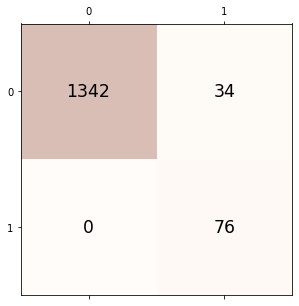

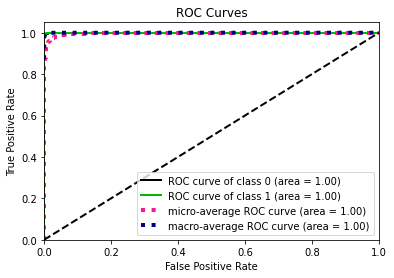

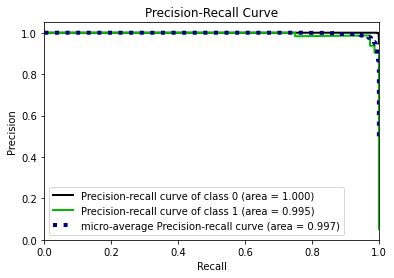

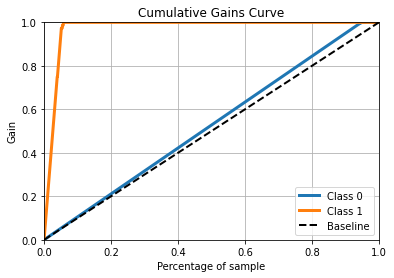

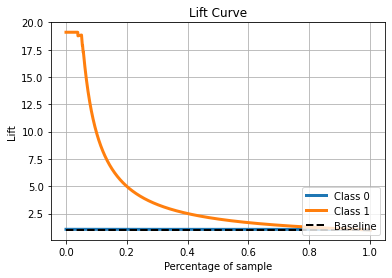

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1376
           1       0.69      1.00      0.82        76

    accuracy                           0.98      1452
   macro avg       0.85      0.99      0.90      1452
weighted avg       0.98      0.98      0.98      1452

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3231
           1       0.76      1.00      0.87       157

    accuracy                           0.99      3388
   macro avg       0.88      0.99      0.93      3388
weighted avg       0.99      0.99      0.99      3388



In [139]:
# Run our model 
build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False)

### CROSS VALIDATION CON RANDOM SEARCH

##### The way cross validation work is that with the random search algorithm we tell it the hyperparameters that we would like to use and the validation will search the best possible hyperparameters that can the be fed into our model and thus fine tune model to work more efficiently. This however does not always work as the hyperparameters may affect the metrics. 

In [140]:
# importing the libraries required to run the random search algorithm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [141]:
# Build and run the random search algorithm and laying the hyperparameters that we would like to be searched

model = XGBClassifier()

param_gridd = {"learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
"max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [ 1, 3, 5, 7 ],
"gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
"scale_pos_weight" : [50, 60, 70, 80, 99, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]} 

#cv= numero de validations 

randmmm = RandomizedSearchCV(estimator=model, param_distributions = param_gridd,
cv =100, n_iter = 10, n_jobs=-1)
randmmm.fit(X_tr, y_tr)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randmmm.best_estimator_)
print("The best score across ALL searched params:", randmmm.best_score_)
print("The best parameters across ALL searched params:", randmmm.best_params_) 

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resource

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
